<a href="https://colab.research.google.com/github/Laysabernardes/INTA/blob/main/ATIVIDADE_MPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Carregar a base de dados
# Certifique-se de que 'dupla4.csv' está no mesmo diretório do seu script
try:
    df = pd.read_csv('/content/drive/MyDrive/Ia/dupla4.csv')
except FileNotFoundError:
    print("Erro: 'dupla4.csv' não encontrado. Por favor, verifique se o arquivo está no diretório correto.")
    # Você pode descomentar a linha abaixo e colocar o caminho completo se o arquivo não estiver na mesma pasta:
    # df = pd.read_csv('/caminho/completo/para/seu/arquivo/dupla4.csv')
    exit() # Sai do script se o arquivo não for encontrado

# 2. Separar features (X) e a variável alvo (y)
# A coluna 'earns' é identificada como a variável alvo e será codificada para 0/1
X = df.drop('earns', axis=1)
y = df['earns'].apply(lambda x: 1 if x.strip() == '>50K' else 0) # Codifica '>50K' como 1 e '<=50K' como 0

# 3. Identificar colunas numéricas e categóricas nas features (X)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 4. Criar o pré-processador usando ColumnTransformer
# 'num': Aplica MinMaxScaler nas colunas numéricas
# 'cat': Aplica OneHotEncoder nas colunas categóricas.
#        sparse_output=False garante que a saída seja um array denso, facilitando a criação do DataFrame.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# 5. Criar um pipeline que inclua o pré-processamento
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# 6. Aplicar o pré-processamento nos dados de features (X)
X_processed = pipeline.fit_transform(X)

# 7. Obter os nomes das colunas após o One-Hot Encoding
# Isso é necessário para reconstruir o DataFrame com os nomes corretos das novas colunas categóricas
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = cat_encoder.get_feature_names_out(categorical_features)

# 8. Combinar os nomes das colunas numéricas originais com os novos nomes das colunas codificadas
# A ordem das colunas no 'X_processed' é: primeiro as numéricas, depois as categóricas (One-Hot Encoded)
all_feature_names = list(numerical_features) + list(encoded_feature_names)

# 9. Converter os dados processados de volta para um DataFrame do Pandas
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# 10. Recombinar o DataFrame de features normalizadas com a variável alvo (y)
# Use y.reset_index(drop=True) para garantir que os índices coincidam corretamente.
normalized_df = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

# 11. Exibir as primeiras linhas da base de dados normalizada para inspeção
print("Primeiras linhas da base de dados normalizada:")
print(normalized_df.head())

# 12. Salvar a base de dados normalizada em um novo arquivo CSV
output_filename = 'dupla4_normalizada_para_ML.csv'
normalized_df.to_csv(output_filename, index=False)
print(f"\nBase de dados normalizada salva como '{output_filename}'")

Primeiras linhas da base de dados normalizada:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours-per-week  workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0        0.397959           0.0                     0.0                   0.0   
1        0.122449           0.0                     0.0                   0.0   
2        0.397959           0.0                     0.0                   0.0   
3        0.397959           0.0                     0.0                   0.0   
4        0.397959           0.0                     0.0                   0.0   

   workclass_ Never-worked  ...  native-country_ Puerto-R

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

print("--- Executando o Código de Classificação MLP ---")

try:
    data = pd.read_csv('/content/dupla4_normalizada_para_ML.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'base_normalizada_minmax.csv' não foi encontrado. Por favor, verifique o nome e o caminho do arquivo.")
    exit()

X = data.drop('earns', axis=1)
y = data['earns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Parametrizando e treinando a rede neural (MLPClassifier)
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42, learning_rate_init=0.001)
classifier.fit(X_train, y_train)

# Prevendo valores para os dados de teste
y_pred_classification = classifier.predict(X_test)

# Calculando a acurácia e outras métricas de classificação
accuracy = metrics.accuracy_score(y_test, y_pred_classification)
print(f"Acurácia (Classificação): {accuracy}")

print("\nRelatório de Classificação:")
print(metrics.classification_report(y_test, y_pred_classification))
print("\nMatriz de Confusão:")
print(metrics.confusion_matrix(y_test, y_pred_classification))

# --- Exportando a base de classificação no final ---
classification_results_df = X_test.copy()
# Resetar o índice de y_test para garantir o alinhamento correto
classification_results_df['earns_actual'] = y_test.reset_index(drop=True)
classification_results_df['earns_predicted'] = y_pred_classification

output_filename_classification = 'classification_results2.csv'
classification_results_df.to_csv(output_filename_classification, index=False)
print(f"\nResultados da classificação exportados para '{output_filename_classification}'")




--- Executando o Código de Classificação MLP ---
Acurácia (Classificação): 0.8432797625140751

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7417
           1       0.68      0.65      0.67      2352

    accuracy                           0.84      9769
   macro avg       0.79      0.78      0.78      9769
weighted avg       0.84      0.84      0.84      9769


Matriz de Confusão:
[[6714  703]
 [ 828 1524]]

Resultados da classificação exportados para 'classification_results.csv'


--- Executando o Código de Regressão MLP ---

Score do Regressor (R^2): 0.31147477088371345


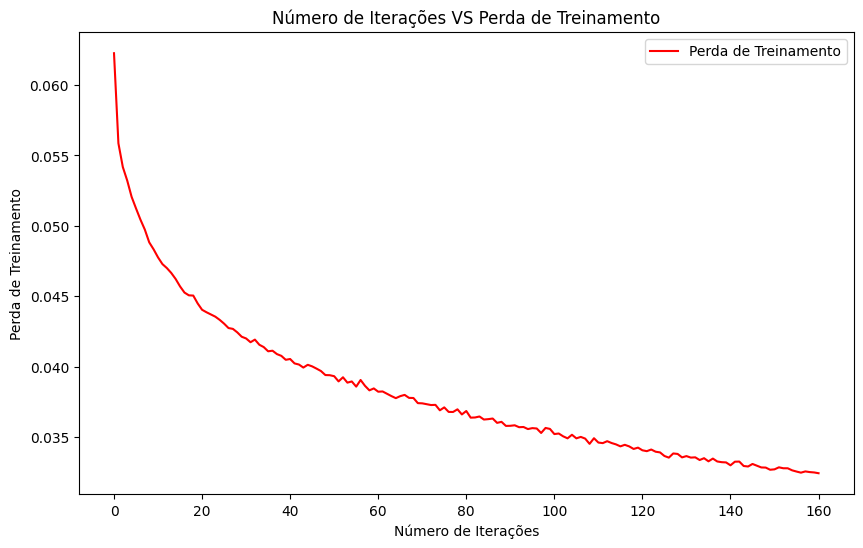

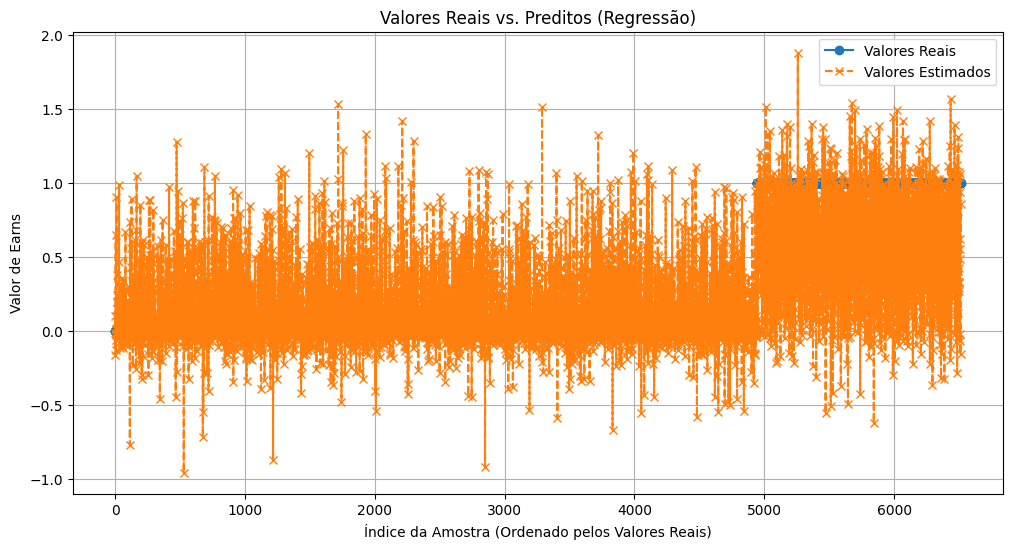


Erro Quadrático Médio (MSE): 0.12601917385231695
Raiz do Erro Quadrático Médio (RMSE): 0.35499179406335146

Resultados da regressão exportados para 'regression_results.csv'


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

print("--- Executando o Código de Regressão MLP ---")

# Importando os dados do arquivo CSV
try:
    df = pd.read_csv('/content/dupla4_normalizada_para_ML.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'base_normalizada_minmax.csv' não foi encontrado. Por favor, verifique o nome e o caminho do arquivo.")
    exit()

# Definindo features (X) e target (y)
X = df.drop('earns', axis=1)
y = df['earns']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Inicializando o modelo de regressão (MLPRegressor)
regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                         activation='relu',
                         solver='adam',
                         learning_rate_init=0.001,
                         max_iter=50000, # Aumentado max_iter para melhor convergência
                         random_state=21)

regressor.fit(X_train, y_train)

print(f"\nScore do Regressor (R^2): {regressor.score(X_test, y_test)}")

# Plotando a curva de erro (curva de perda)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(regressor.loss_curve_)), regressor.loss_curve_, color='red', label='Perda de Treinamento')
plt.title('Número de Iterações VS Perda de Treinamento')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda de Treinamento')
plt.legend()
plt.show()

# Prevendo valores para a base de teste
y_pred_regressor = regressor.predict(X_test)

# Plotando dados estimados vs. dados corretos
results_df_regressor_plot = pd.DataFrame({'Valores Reais (Earns)': y_test.reset_index(drop=True), 'Valores Preditos (Earns)': y_pred_regressor})
results_df_regressor_plot = results_df_regressor_plot.sort_values(by='Valores Reais (Earns)').reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(results_df_regressor_plot.index, results_df_regressor_plot['Valores Reais (Earns)'], marker='o', linestyle='-', label='Valores Reais')
plt.plot(results_df_regressor_plot.index, results_df_regressor_plot['Valores Preditos (Earns)'], marker='x', linestyle='--', label='Valores Estimados')
plt.title('Valores Reais vs. Preditos (Regressão)')
plt.xlabel('Índice da Amostra (Ordenado pelos Valores Reais)')
plt.ylabel('Valor de Earns')
plt.legend()
plt.grid(True)
plt.show()

# Métricas de avaliação de regressão
mse = metrics.mean_squared_error(y_test, y_pred_regressor)
print(f"\nErro Quadrático Médio (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")

# --- Exportando a base de regressão no final ---
# Criar um DataFrame com os dados de teste originais, os valores reais e os valores preditos
regression_results_df = X_test.copy()
# Resetar o índice de y_test para garantir o alinhamento correto
regression_results_df['earns_actual'] = y_test.reset_index(drop=True)
regression_results_df['earns_predicted'] = y_pred_regressor

# Salvar o DataFrame em um arquivo CSV
output_filename_regression = 'regression_results.csv'
regression_results_df.to_csv(output_filename_regression, index=False)
print(f"\nResultados da regressão exportados para '{output_filename_regression}'")




